In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# file_path = 'export_sample.xml'
file_path = '/Users/brad/Downloads/apple_health_export/내보내기.xml'

## XML to Pandas DataFrame

https://github.com/minimaxir/get-heart-rate-csv

In [3]:
df = pd.DataFrame([], columns=['date', 'bpm'])

pattern = '^.*IdentifierHeartRate".*startDate="(.{19}).*value="([0-9]*).*$'

with open(file_path, 'r') as f:
    for line in f:
        search = re.search(pattern, line)
        if search is not None:
            
            df = df.append({
                'date': search.group(1),
                'bpm': search.group(2)
            }, ignore_index=True)

df.date = pd.to_datetime(df.date)
df.bpm = pd.to_numeric(df.bpm)

df = df.set_index('date')
df = df.sort_index()

df.head()

,bpm
date,
2021-11-03 15:08:00,67
2021-11-03 15:09:46,72
2021-11-03 15:14:18,68
2021-11-03 15:14:50,64
2021-11-03 15:23:02,68


## Line Plot

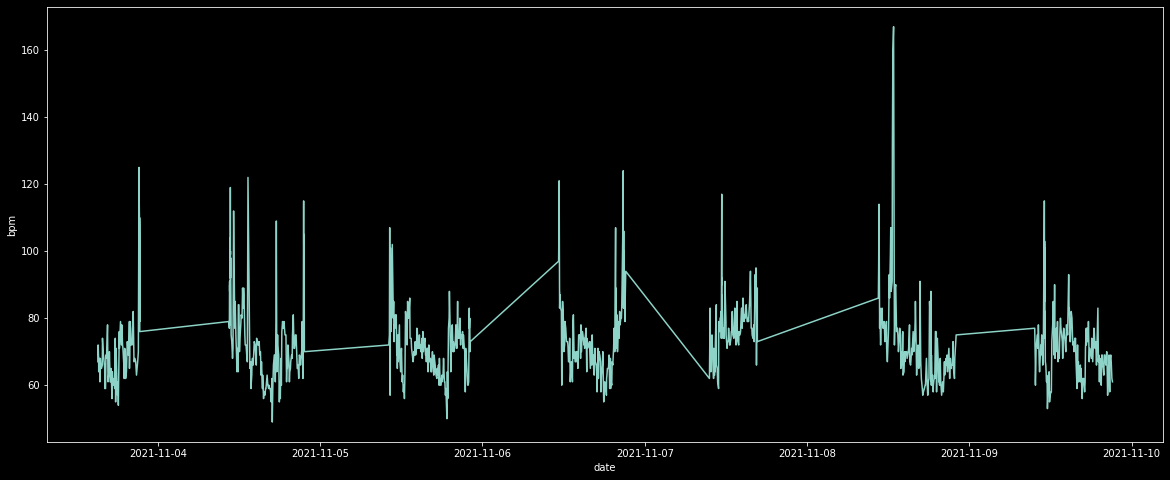

In [4]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df.index, y=df.bpm)
plt.show()

## KDE Plot

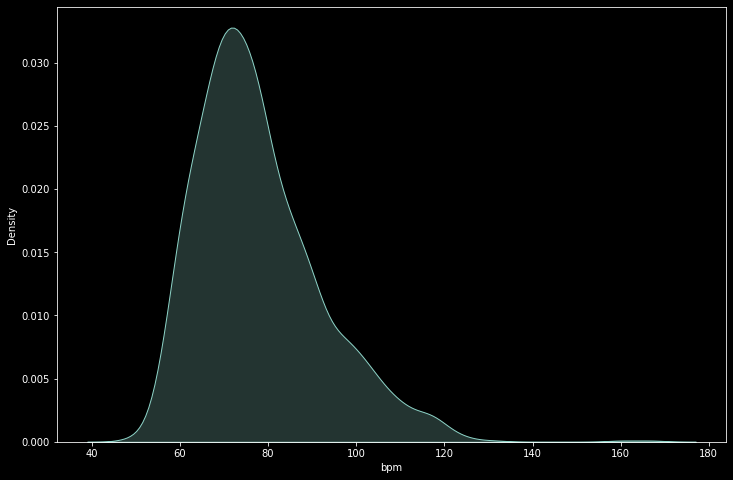

In [5]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=df.bpm, fill=True)
plt.show()

## Filter by Date

In [6]:
df_211108 = df.loc['2021-11-08']

df_211108

,bpm
date,
2021-11-08 10:32:38,86
2021-11-08 10:35:05,95
2021-11-08 10:38:10,114
2021-11-08 10:42:59,80
2021-11-08 10:43:57,77
...,...
2021-11-08 21:38:51,65
2021-11-08 21:45:01,63
2021-11-08 21:47:57,62


## Line Plot at 2021-11-08

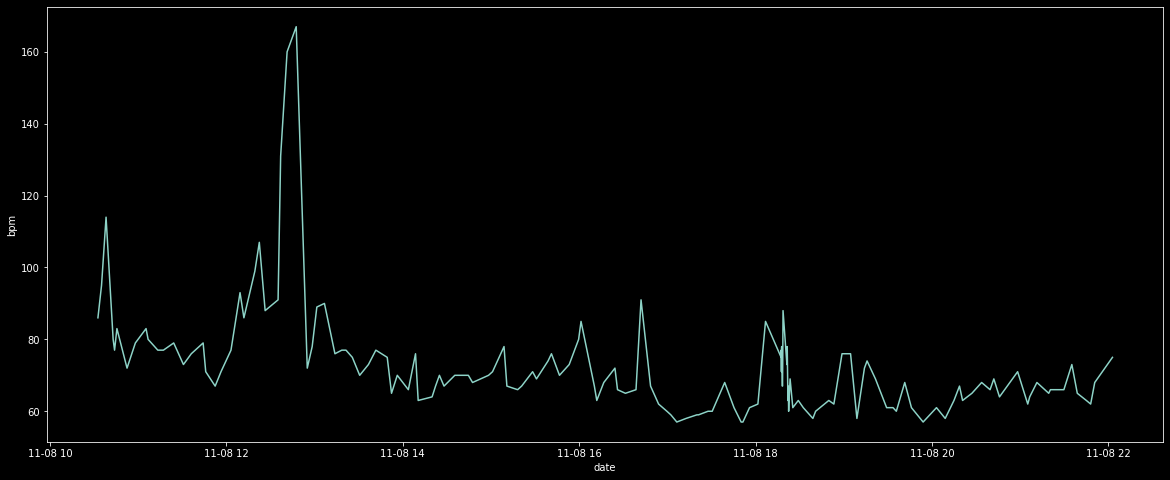

In [7]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211108.index, y=df_211108.bpm)
plt.show()

## Notes

In [8]:
notes = [{
        'time': '2021-11-08 12:45:00',
        'note': 'Kiss'
    }, {
        'time': '2021-11-08 17:00:00',
        'note': 'Coding'
    }, {
        'time': '2021-11-08 18:10:00',
        'note': 'Dinner'
}]

## Get Nearest Index by Datetime

In [9]:
dt = pd.to_datetime('2021-11-08 12:45:00')

df_211108.index.get_loc(dt, method='nearest')

29

## Heart Rate Note

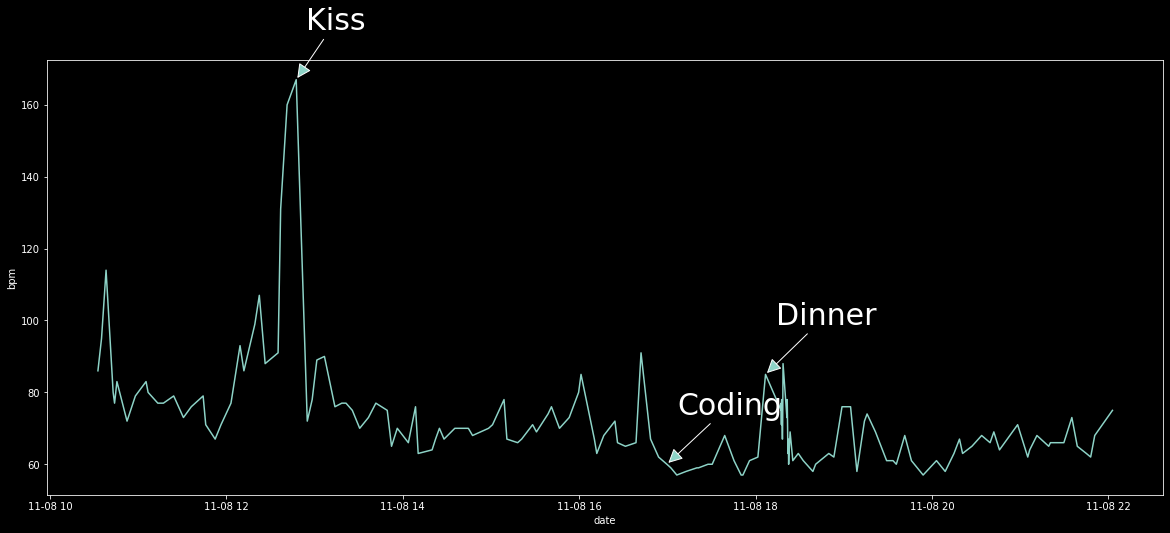

In [10]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211108.index, y=df_211108.bpm)

for note in notes:
    dt = pd.to_datetime(note['time'])
    idx = df_211108.index.get_loc(dt, method='nearest')

    plt.annotate(
        note['note'],
        (df_211108.iloc[idx].name, df_211108.iloc[idx].bpm),
        xytext=(10, 50), 
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>'),
        fontsize=30
    )

plt.show()